Bayesian Information Criterion: 50.21824821939818
Davies-Bouldin Index: 0.2893792767901513
Silhouette Score: 0.7827738719266039
Calinski-Harabasz Index: 630.8235586596012
Cluster Membership: [0 2 1 0 2 2 1 0 2 1 0 0 2 0 2 2 1 1 1 1 0 1 2 2 2 2 1 0 2 2 1 0 1 1 0 0 0
 1 0 1 2 1 2 2 1 0 0 0 0 1]


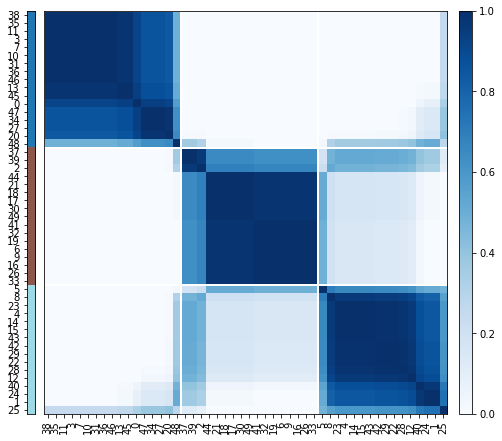

In [2]:
# from pyckmeans import CKmeans

# # simulate dataset
# # 50 samples, 2 features, 3 true clusters
# import sklearn.datasets
# x, _ = sklearn.datasets.make_blobs(n_samples=50, n_features=2, centers=3, random_state=75)

# # apply Consensus K-Means
# # 3 clusters, 100 K-Means runs,
# # draw 80% of samples and 50% of features for each single K-Means
# ckm = CKmeans(k=3, n_rep=100, p_samp=0.8, p_feat=0.5)
# ckm.fit(x)
# ckm_res = ckm.predict(x)

# # plot consensus matrix and consensus clustering
# fig = ckm_res.plot(figsize=(7,7))

# # consensus matrix
# ckm_res.cmatrix

# # clustering metrics
# print('Bayesian Information Criterion:', ckm_res.bic)
# print('Davies-Bouldin Index:', ckm_res.db)
# print('Silhouette Score:', ckm_res.sil)
# print('Calinski-Harabasz Index:', ckm_res.ch)

# # consensus clusters
# print('Cluster Membership:', ckm_res.cl)


In [13]:
from pyckmeans import MultiCKMeans
import sklearn.datasets
import math
import pandas as pd
# import tensorflow as tf
# # import keras_tuner.tuners as kt
# import matplotlib.pyplot as plt
# import keras
# from tensorflow.keras import Model
# from tensorflow.keras import Sequential
# from sklearn.preprocessing import StandardScaler
# from tensorflow.keras.layers import Dense, Dropout
# from sklearn.model_selection import train_test_split
# from tensorflow.keras.losses import MeanSquaredLogarithmicError
import numpy as np
import pickle
# np.random.seed(0)
# from tensorflow.keras import Input
# from tensorflow.keras.layers import Conv1D, Conv2D, LeakyReLU, MaxPool1D, AveragePooling1D, UpSampling1D, Flatten, Dense, Reshape, BatchNormalization
# # https://towardsdatascience.com/improve-your-model-performance-with-auto-encoders-d4ee543b4154
# from tensorflow.keras import initializers
# from keras.wrappers.scikit_learn import KerasRegressor
# from sklearn.model_selection import GridSearchCV
# from scipy.stats import multivariate_normal
# from keras.optimizers import Adam, SGD, Adadelta


In [12]:
x_test_scaled = pd.read_csv('../260_sample_test_scaled.csv').set_index("Patient_ID")
x_test_scaled

,AADAC,APOA1,APOA4,APOB,APOC3,AQP9,C6,CEACAM7,CHI3L1,ABCC2,...,TAF15,ZFYVE20,LOC100420253,LY6G5B,C5orf58,RSL24D1P1,MIEN1,PCBP1_AS1,LOC100133165,DNAJB8
Patient_ID,,,,,,,,,,,,,,,,,,,,,
253_CD_plain,0.869185,0.841880,0.930171,0.886737,0.835678,0.297964,0.668498,0.266670,0.278122,0.933520,...,0.339788,0.326732,0.0,0.862246,0.074473,0.0,0.498941,0.349920,0.0,0.0
105_CD_plain,0.853562,0.933532,0.942213,0.794578,0.890482,0.206529,0.298987,0.350745,0.495663,0.849038,...,0.354602,-0.031527,0.0,0.717305,0.039214,0.0,0.697073,0.268224,0.0,0.0
2_CD_plain,0.165531,0.141475,0.263684,0.198091,0.160503,0.888878,0.000000,0.134461,0.989132,0.202203,...,0.320002,0.379134,0.0,0.604202,0.610072,0.0,0.324065,0.375123,0.0,0.0
184_CD_plain,0.717121,0.660314,0.769417,0.752737,0.694874,0.514735,0.692365,0.271127,0.650742,0.694599,...,0.445680,0.178908,0.0,0.702114,0.325357,0.0,0.390919,0.185509,0.0,0.0
312_CD_plain,0.730072,0.722909,0.713076,0.743545,0.679258,0.308459,0.399235,0.129019,0.597529,0.720390,...,0.419254,0.312215,0.0,0.821584,0.632007,0.0,0.183158,0.271359,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107_CD_plain,0.736123,0.658232,0.772323,0.685637,0.658755,0.250970,0.247307,0.422075,0.555944,0.603675,...,0.379431,0.233196,0.0,0.759342,0.567491,0.0,0.404604,0.190411,0.0,0.0
279_CD_plain,0.220614,0.202090,0.182810,0.113245,0.105744,0.699851,0.000000,0.908485,0.688912,0.178259,...,0.181052,0.342262,0.0,0.639644,0.540444,0.0,0.397274,0.061934,0.0,0.0
179_CD_plain,0.724476,0.726774,0.766943,0.776284,0.690339,0.380637,0.440449,0.318944,0.558600,0.738787,...,0.331961,0.275577,0.0,0.886616,0.658049,0.0,0.259391,0.471132,0.0,0.0


In [15]:
with open("../shap_values", "rb") as fp:   # Unpickling
    shap_values = pickle.load(fp)

In [16]:
all_gene_df_shap = pd.DataFrame(shap_values[2], index=x_test_scaled.index, columns = x_test_scaled.columns)
df_cd_deep_shap = all_gene_df_shap[all_gene_df_shap.index.str.endswith('_CD_deep_ulcer')]
df_cd_plain_shap = all_gene_df_shap[all_gene_df_shap.index.str.endswith('_CD_plain')]
df_control_shap = all_gene_df_shap[all_gene_df_shap.index.str.endswith('_control')]
df_cd_deep_shap

,AADAC,APOA1,APOA4,APOB,APOC3,AQP9,C6,CEACAM7,CHI3L1,ABCC2,...,TAF15,ZFYVE20,LOC100420253,LY6G5B,C5orf58,RSL24D1P1,MIEN1,PCBP1_AS1,LOC100133165,DNAJB8
Patient_ID,,,,,,,,,,,,,,,,,,,,,
62_CD_deep_ulcer,-0.003603,0.105250,-0.047044,-0.014947,0.000000,0.187628,0.044242,-0.022843,-0.039989,-0.027093,...,0.005510,0.020320,0.0,0.005488,0.093866,0.0,-0.022522,0.017015,0.0,-0.005428
167_CD_deep_ulcer,0.000000,0.126500,-0.008472,-0.008706,0.006454,0.038979,0.077657,-0.009717,0.004276,-0.044046,...,0.000000,0.014907,0.0,-0.010542,0.000000,0.0,0.011755,0.015677,0.0,0.003833
196_CD_deep_ulcer,-0.015137,0.107726,-0.019753,-0.035331,-0.005677,0.071594,0.085403,-0.028361,-0.003345,-0.070816,...,0.006771,0.011001,0.0,-0.010174,0.053967,0.0,-0.006063,0.019399,0.0,0.000000
23_CD_deep_ulcer,-0.008684,0.120806,0.010906,0.010129,0.008627,0.021136,0.103641,-0.014707,-0.043298,-0.013828,...,-0.002069,-0.007453,0.0,-0.004402,-0.007919,0.0,-0.038069,-0.007942,0.0,0.000229
93_CD_deep_ulcer,-0.012503,0.072120,0.015956,0.025606,0.023989,-0.010768,0.062960,-0.015463,-0.005831,-0.006509,...,0.000000,0.011604,0.0,0.009995,-0.009878,0.0,-0.046551,-0.013389,0.0,0.007504
229_CD_deep_ulcer,0.001986,-0.029862,0.033261,0.012434,0.004867,0.043208,0.135541,-0.023186,-0.031205,0.000694,...,-0.004143,-0.003321,0.0,-0.016468,0.000000,0.0,-0.005444,-0.004833,0.0,-0.003707
46_CD_deep_ulcer,-0.018424,0.047551,-0.018109,-0.022701,0.022517,0.073889,0.000000,-0.003175,-0.079742,-0.048241,...,-0.010020,0.006414,0.0,-0.021528,-0.015837,0.0,-0.047300,0.073698,0.0,-0.003912
176_CD_deep_ulcer,-0.008224,-0.041478,0.008979,0.003781,0.006723,-0.004739,0.028163,-0.021048,0.000000,0.017253,...,-0.018132,0.013266,0.0,-0.006989,-0.021579,0.0,0.029404,0.019017,0.0,-0.006064
49_CD_deep_ulcer,0.031895,0.041962,-0.021250,-0.009139,0.014773,-0.114689,-0.004494,0.089633,-0.024799,-0.078440,...,0.000000,0.005732,0.0,-0.013694,0.023908,0.0,-0.010416,0.000000,0.0,-0.028094


Metrics:
   k       sil        bic        db         ch
0  2  0.365457 -23.892819  0.923673   8.909889
1  3  0.367118 -30.880175  0.889226  12.032703
2  4  0.157436 -31.390978  1.256915  10.016744
3  5  0.172490 -31.712772  1.036338   9.003130


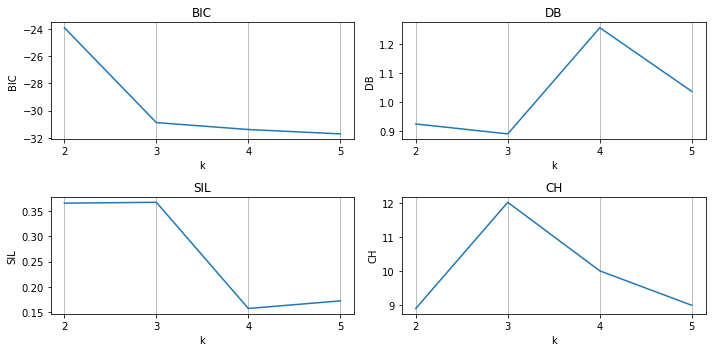

In [17]:



# simulate dataset
# 50 samples, 10 features, 3 true clusters
x, _ = sklearn.datasets.make_blobs(n_samples=50, n_features=10, centers=3, random_state=44)

# apply multiple Consensus K-Means for
# k = 2, ..., 5
# 100 K-Means runs per Consensus K-Means
# draw 80% of the sample for each single K-Means
# draw 50% of the features for each single K-Means
mckm = MultiCKMeans(k=[2, 3, 4, 5], n_rep=100, p_samp=0.8, p_feat=0.5)
mckm.fit(df_cd_deep_shap.values)
mckm_res = mckm.predict(df_cd_deep_shap.values)

# clustering metrics
print('Metrics:')
print(mckm_res.metrics)

# plot clustering metrics against k
# BIC, DB: lower is better
# SIL, CH: higher is better
mckm_res.plot_metrics(figsize=(10,5))


# get a single CKmeansResult                  0 |1| 2  3
ckm_res_k3 = mckm_res.ckmeans_results[1] # k=[2, 3, 4, 5]
# ...
# see "Clustering a Data Matrix (Single K)"

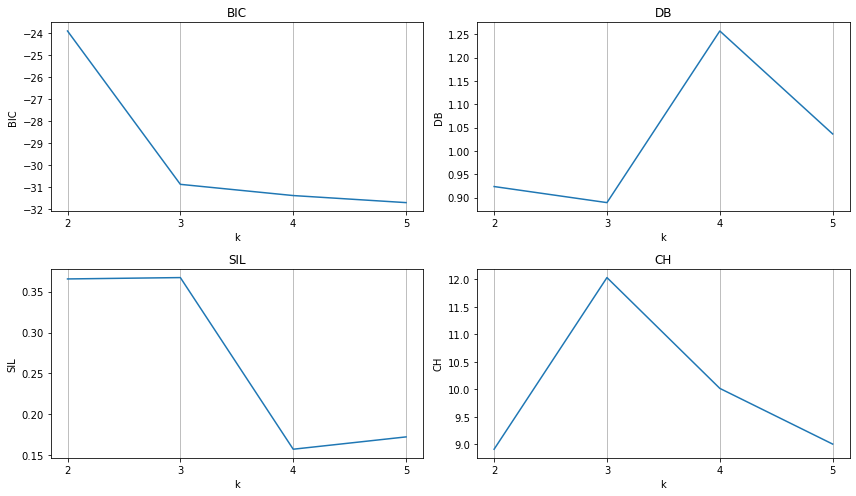

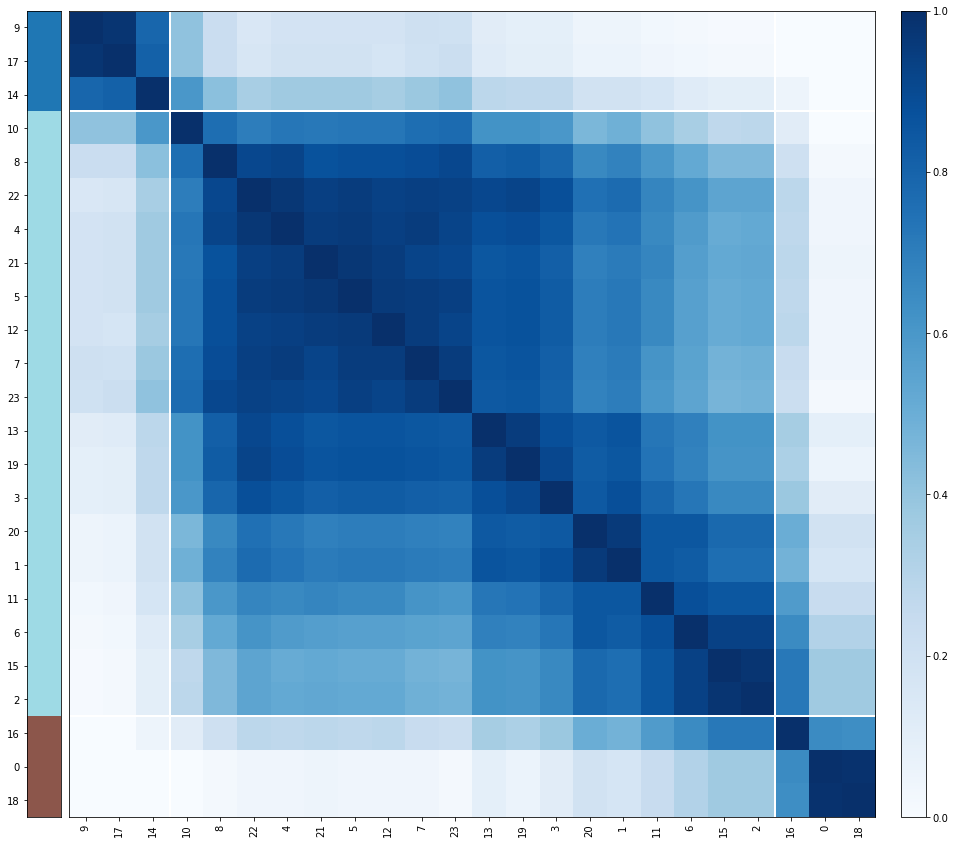

In [29]:
mckm_res.plot_metrics(figsize=(12, 7))

# Select a 'good' K
# At k values around 7, BIC, DB, and SIL have a (local) optimum
ckm_res_k7 = mckm_res.ckmeans_results[1]
fig = ckm_res_k7.plot(figsize=(14,14))

In [46]:
print('Cluster Membership:', ckm_res_k7.cl)

Cluster Membership: [1 2 2 2 2 2 2 2 2 0 2 2 2 2 0 2 1 0 1 2 2 2 2 2]


In [23]:
type(fig)

matplotlib.figure.Figure

In [24]:
fig.get_label()

''

In [26]:
x = np.linspace(0, 6*np.pi, 100)
y = np.sin(x)
ax = fig.add_subplot(111)
line1, = ax.plot(x, y, 'r-') # Returns a tuple of line objects, thus the comma

for phase in np.linspace(0, 10*np.pi, 500):
    line1.set_ydata(np.sin(x + phase))
    fig.canvas.draw()
    fig.canvas.flush_events()

C:\Users\shard\anaconda3\envs\pyck\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


In [36]:
fig.axes

In [37]:
curr_ax = fig.axes[0]

In [43]:
gene_labels = df_cd_deep.index
gene_labels.shape

(24,)

In [44]:
curr_ax.set_xticklabels(gene_labels, fontdict=None, minor=False)

[Text(0, 0, '62_CD_deep_ulcer'),
 Text(1, 0, '167_CD_deep_ulcer'),
 Text(2, 0, '196_CD_deep_ulcer'),
 Text(3, 0, '23_CD_deep_ulcer'),
 Text(4, 0, '93_CD_deep_ulcer'),
 Text(5, 0, '229_CD_deep_ulcer'),
 Text(6, 0, '46_CD_deep_ulcer'),
 Text(7, 0, '176_CD_deep_ulcer'),
 Text(8, 0, '49_CD_deep_ulcer'),
 Text(9, 0, '183_CD_deep_ulcer'),
 Text(10, 0, '50_CD_deep_ulcer'),
 Text(11, 0, '236_CD_deep_ulcer'),
 Text(12, 0, '260_CD_deep_ulcer'),
 Text(13, 0, '177_CD_deep_ulcer'),
 Text(14, 0, '212_CD_deep_ulcer'),
 Text(15, 0, '230_CD_deep_ulcer'),
 Text(16, 0, '259_CD_deep_ulcer'),
 Text(17, 0, '59_CD_deep_ulcer'),
 Text(18, 0, '98_CD_deep_ulcer'),
 Text(19, 0, '145_CD_deep_ulcer'),
 Text(20, 0, '143_CD_deep_ulcer'),
 Text(21, 0, '165_CD_deep_ulcer'),
 Text(22, 0, '70_CD_deep_ulcer'),
 Text(23, 0, '256_CD_deep_ulcer')]

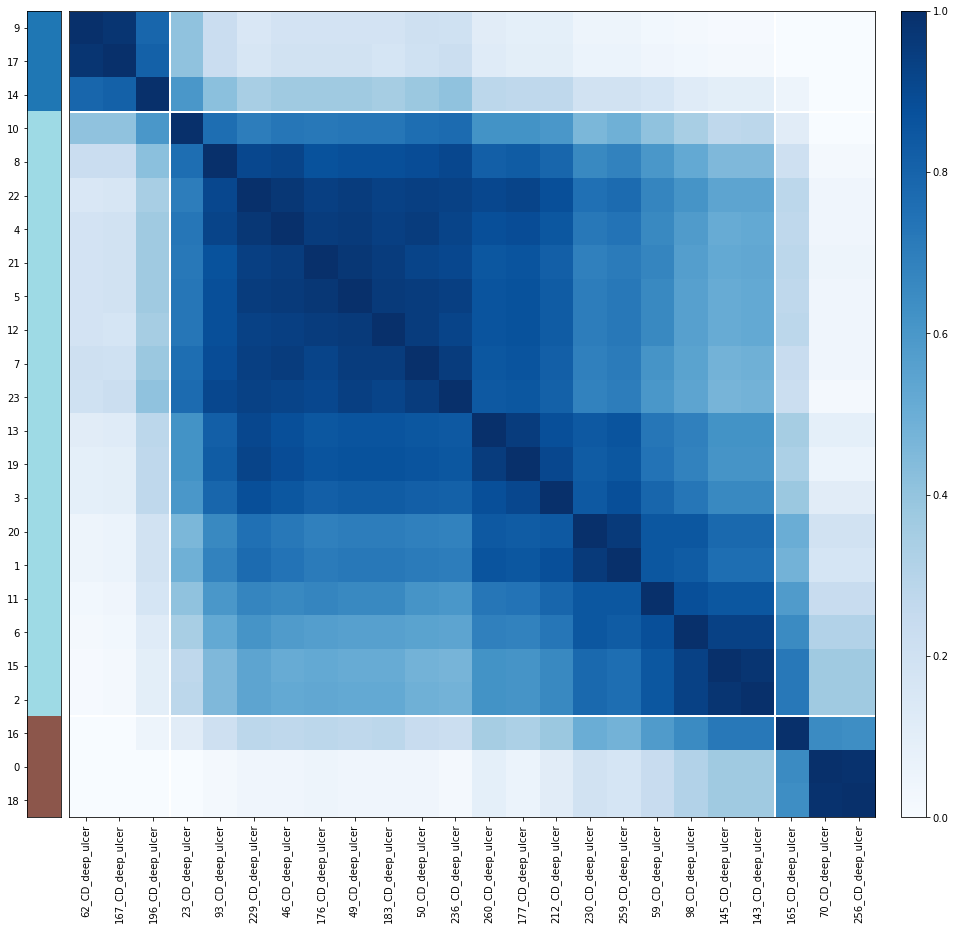

In [45]:
fig